gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 49|  2500  | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 0.00000E+00 
 50|  2550  | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 0.00000E+00 
 51|  2600  | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 0.00000E+00 
 52|  2650  | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 1.32943E+00 | 0.00000E+00 
 53|  2700  | 1.32943E+00 | 1.32943E+00 | 1.32926E+00 | 1.32908E+00 | 1.75147E-04 
 54|  2750  | 1.32943E+00 | 1.32943E+00 | 1.32926E+00 | 1.32908E+00 | 1.75147E-04 
 55|  2800  | 1.32955E+00 | 1.32955E+00 | 1.32928E+00 | 1.32905E+00 | 2.16299E-04 
 56|  2850  | 1.32955E+00 | 1.32955E+00 | 1.32933E+00 | 1.32905E+00 | 2.14952E-04 
 57|  2900  | 1.32985E+00 | 1.32985E+00 | 1.32949E+00 | 1.32905E+00 | 2.23055E-04 
 58|  2950  | 1.33016E+00 | 1.33016E+00 | 1.32966E+00 | 1.32905E+00 | 2.90821E-04 
 59|

390| 19550  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 1.17601E-11 
391| 19600  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 8.68949E-12 
392| 19650  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 8.29591E-12 
393| 19700  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 5.98192E-12 
394| 19750  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 4.11030E-12 
395| 19800  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 3.14828E-12 
396| 19850  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.84918E-12 
397| 19900  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.82851E-12 
398| 19950  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.22430E-12 
399| 20000  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.15153E-12 
400| 20050  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 1.97037E-13 
401| 20100  | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 2.50000E+00 | 1.75339E-13 
402|

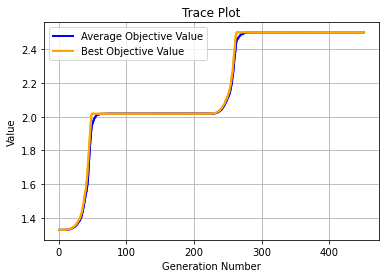

评价次数：25000
时间已过0.22823286056518555秒
最优的目标函数值为：2.4999999984119663
最优的控制变量值为：
0.4999999994706553
0.0
0.5000000005293448


In [52]:
import numpy as np
import geatpy as ea

class Myproblem(ea.Problem):
    
    def __int__(self):
        super(Myproblem,self).__init__(name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
        
    def aimFunc(self, pop):
        Vars = pop.Phen
        x1 = Vars[:, [0]]
        x2 = Vars[:, [1]]
        x3 = Vars[:, [2]]     
        # 采用可行性法则处理约束，生成种群个体违反约束程度矩阵
        pop.ObjV = 4*x1 + 2*x2 + x3
        pop.CV = np.hstack([2*x1 + x2 - 1,
                            x1 + 2*x3 -2,
                            np.abs(x1 + x2 + x3 - 1)])
#         #采用罚函数法处理约束
#         f = 4*x1 + 2*x2 + x3
#         exIdx1 = np.where(2*x1+x2>1)[0]#找到违反约束条件1的个体索引
#         exIdx2 = np.where(x1+2*x3>2)[0]#找到违反约束条件2的个体索引
#         exIdx3 = np.where(x1+x2+x3!=1)[0]#找到违反约束条件3的个体索引
#         exIdx = np.unique(np.hstack([exIdx1,exIdx2,exIdx3]))#合并索引
#         alpha = 4 #惩罚缩放因子
#         beta = 0.2#惩罚最小偏移量
#         f[exIdx] += self.maxormins[0]*alpha *(np.max(f)-np.min(f)+beta)
#         pop.ObjV = f#把目标函数值矩阵赋值给种群的ObjV属性
#         # 但本案例中包含一个等式约束，用这种简单的惩罚方法难以找到可行解（最坏结果会是一个可行解都没有找到），读者可以自行尝试。

name = 'MyProblem'
M = 1 # 目标函数的个数
maxormins = [-1]
Dim = 3 # 决策变量维数
varTypes = [0] * Dim # 初始化决策变量类型, 0 是连续
lb = [0, 0, 0]
ub = [1, 1, 1]
lbin = [1, 1, 0]
ubin = [1, 1, 0]
problem = Myproblem(name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)#实例化问题对象
Encoding = 'RI'
NIND = 50 # 种群大小
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders)# 创建区域描述器
population = ea.Population(Encoding, Field, NIND) # 实例化种群对象
myAlgorithm = ea.soea_DE_best_1_L_templet(problem, population)# 实例化算法模板
myAlgorithm.MAXGEN = 500#最大进化代数
myAlgorithm.mutOper.F = 0.5#差分进化中的参数F
myAlgorithm.recOper.XOVR = 0.9#设置交叉概率
myAlgorithm.logTras = 1#设置每隔多少代记录日志，若设置成0则表示不记录日志
myAlgorithm.verbose = True#设置是否打印输出日志信息
myAlgorithm.drawing = 1
[BestIndi, population] = myAlgorithm.run()
BestIndi.save()#把最优个体的信息保存到文件中
print('评价次数：%s'% myAlgorithm.evalsNum)
print('时间已过%s秒'% myAlgorithm.passTime)
if BestIndi.sizes != 0:
    print('最优的目标函数值为：%s'% BestIndi.ObjV[0][0])
    print('最优的控制变量值为：')
    for i in range(BestIndi.Phen.shape[1]):
        print(BestIndi.Phen[0, i])
else:
    print('没找到可行解。')